# 1. Generating a complex dataset

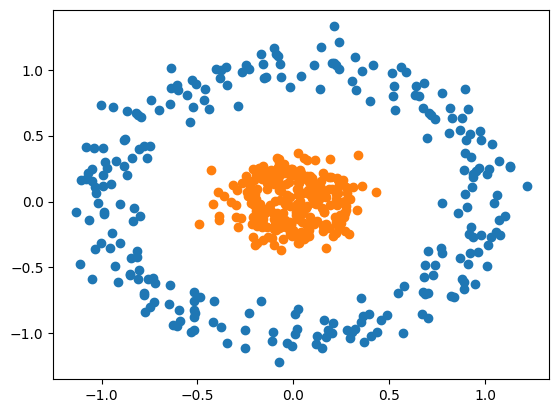

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Seed of number generator so get the same random data everytime
state = 123

# Amount of points we are aiming for
samples = 500

# Generate dataset
xy, label = datasets.make_circles(n_samples=samples, random_state=state, noise=0.1, factor=0.2)

# Visualize dataset
plt.scatter(xy[label==0, 0], xy[label==0, 1])
plt.scatter(xy[label==1, 0], xy[label==1, 1])

input = torch.Tensor(xy)
output = torch.Tensor(label.reshape(500, 1))

# 2. Creating a model with a hidden layer

<generator object Module.parameters at 0x78e82869b7d0>


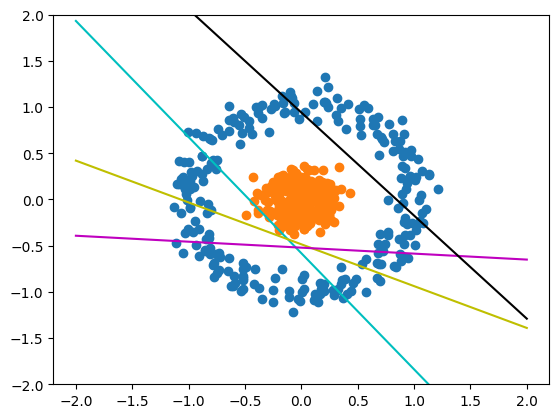

In [43]:
import torch.nn as nn

class Model(nn.Module):

	def __init__(self, input_size, hidden_1, output_size):
		super().__init__()
		self.linear1 = nn.Linear(input_size, hidden_1)
		self.linear2 = nn.Linear(hidden_1, output_size)

	def forward(self, x):
		# Forward the input through the first layer
		x = self.linear1(x)
		x = torch.sigmoid(x)

		# Forward the output of the first layer throught the second layer
		y = self.linear2(x)
		y = torch.sigmoid(y)

		return y

	def predict(self, x):
		return 1 if self.forward(x) > 0.5 else 0

  # Method returns current model weights and bias
	def wanb(self):
		print(model.parameters())
		[weights, h1, h2, bias] = model.parameters()
		w1, w2, w3, w4, w5, w6, w7, w8 = weights.view(8)
		b1 = bias[0]
		return \
			w1.item(), w2.item(), w3.item(), w4.item(), \
			w5.item(), w6.item(), w7.item(), w8.item(), \
			b1.item()

# Seed of number generator so get the same random data everytime
torch.manual_seed(3)

# Instance the model with 2 inputs, 4 nodes on the hidden layer and 1 output
model = Model(2, 4, 1)

# Get the current weights and bias
w1, w2, w3, w4, w5, w6, w7, w8, b1 = model.wanb()

# Create two x inputs
x = np.array([-2.0, 2.0])

# Get two y outputs according to the current model's weights and bias
y1 = (w1 * x + b1) / -w2
y2 = (w3 * x + b1) / -w4
y3 = (w5 * x + b1) / -w6
y4 = (w7 * x + b1) / -w8

# Visualize the untrained model prediction on top of the dataset
plt.ylim([-2, 2])
plt.plot(x, y1, 'c')
plt.plot(x, y2, 'y')
plt.plot(x, y3, 'm')
plt.plot(x, y4, 'k')
plt.scatter(xy[label==0, 0], xy[label==0, 1])
plt.scatter(xy[label==1, 0], xy[label==1, 1])

# 3. Training the model

<generator object Module.parameters at 0x78e828b8dbd0>
<generator object Module.parameters at 0x78e828b8dd90>
<generator object Module.parameters at 0x78e828b8dcb0>
<generator object Module.parameters at 0x78e828b8df50>
<generator object Module.parameters at 0x78e828b8de00>
<generator object Module.parameters at 0x78e828b8e110>
<generator object Module.parameters at 0x78e828b8dfc0>
<generator object Module.parameters at 0x78e828b8e2d0>
<generator object Module.parameters at 0x78e828b8e420>


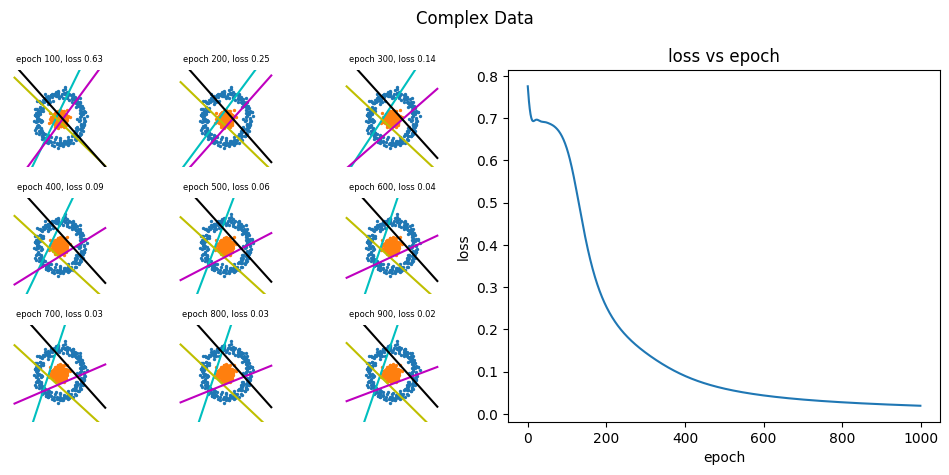

In [41]:
torch.manual_seed(3)
model = Model(2, 4, 1)

# Loss function : Binary Cross Entropy Loss
lossfn = nn.BCELoss()

# Optimizer : Adaptive Moment Estimation
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

epochs = 1000
losses = []

plot = -1
fig, axes = plt.subplot_mosaic("012xxx;345xxx;678xxx", tight_layout=True, figsize=(9.6, 4.8))
fig.suptitle('Complex Data')

for i in range(epochs):
	y = model.forward(input)
	loss = lossfn(y, output)
	losses.append(loss.item())

	optimizer.zero_grad()
	loss.backward()
	optimizer.step()

	if i % (epochs / 10) == 0 and i > 0:

		plot += 1

		# Get the current weights and bias
		w1, w2, w3, w4, w5, w6, w7, w8, b1 = model.wanb()

		# Create two x inputs
		x = np.array([-2.0, 2.0])

		# Get two y outputs according to the current model's weights and bias
		y1 = (w1 * x + b1) / -w2
		y2 = (w3 * x + b1) / -w4
		y3 = (w5 * x + b1) / -w6
		y4 = (w7 * x + b1) / -w8

		# Visualize the untrained model prediction on top of the dataset
		axes[f'{plot}'].set_title(f'epoch {i}, loss {loss:0.2f}', fontsize=6)
		axes[f'{plot}'].axis('off')
		axes[f'{plot}'].set_ylim([-2, 2])
		axes[f'{plot}'].plot(x, y1, 'c')
		axes[f'{plot}'].plot(x, y2, 'y')
		axes[f'{plot}'].plot(x, y3, 'm')
		axes[f'{plot}'].plot(x, y4, 'k')
		axes[f'{plot}'].scatter(xy[label==0, 0], xy[label==0, 1], s=2)
		axes[f'{plot}'].scatter(xy[label==1, 0], xy[label==1, 1], s=2)

axes['x'].set_title('loss vs epoch')
axes['x'].set_xlabel('epoch')
axes['x'].set_ylabel('loss')
axes['x'].plot(range(epochs), losses)

# 4. Testing the model

A is classified as : 0
B is classified as : 1
C is classified as : 1
D is classified as : 0


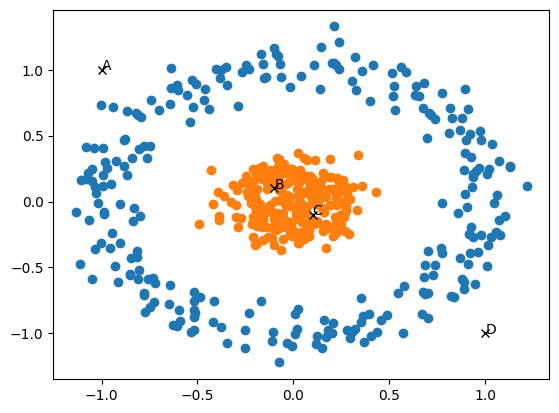

In [42]:
plt.scatter(xy[label==0, 0], xy[label==0, 1])
plt.scatter(xy[label==1, 0], xy[label==1, 1])

point1 = torch.Tensor([-1.0, 1.0])
point2 = torch.Tensor([-0.1, 0.1])
point3 = torch.Tensor([0.1, -0.1])
point4 = torch.Tensor([1.0, -1.0])

plt.plot(*point1.numpy(), 'kx')
plt.plot(*point2.numpy(), 'kx')
plt.plot(*point3.numpy(), 'kx')
plt.plot(*point4.numpy(), 'kx')

plt.annotate('A', point1.numpy())
plt.annotate('B', point2.numpy())
plt.annotate('C', point3.numpy())
plt.annotate('D', point4.numpy())

A = model.predict(point1)
B = model.predict(point2)
C = model.predict(point3)
D = model.predict(point4)

print(f'A is classified as : {A}')
print(f'B is classified as : {B}')
print(f'C is classified as : {C}')
print(f'D is classified as : {D}')